# El paquete Plots.jl


El paquete `Plots.jl` nos permite hacer gráficas en Julia de una manera sencilla y rápida.  Este tutorial pretende enseñar lo suficiente para realizar todas las gráficas necesarias para un estudiante de ciencia. 

## Instalación

Para instalar el paquete, podemos utilizar el manejador de paquetes de Julia y correr el siguiente comando:

In [2]:
Pkg.add("Plots")

INFO: Package Plots is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages


Si ahora queremos usar el paquete, debemos importarlo utilizando el comando `Using` seguido del nobre del paquete:

In [3]:
using Plots

## Backends

`Plots.jl` es un paquete que nos permite realizar gráficas en distintos estilos predeterminados, que se denominan **backends**. Hay aunque hay muchos backends, hay algunos que debemos destacar:

1. `GR` Backend default de Plots. Rápido, simple y elegante, e installado por default con `Plots.jl`
2. `PlotlyJS` Backend creado sobre la librería de Javascript [Plotly](https://plot.ly/javascript/line-and-scatter/). Crea gráficas interactivas. Debe de ser installado por su cuenta utilizando `Pkg.add("PlotlyJS")`.
3. `pyplot` Backend creado sobre la librería de Python [Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html). Debe de ser installado por su cuenta utilizando `Pkg.add("pyplot")`.

Para declarar que Backend queremos usar, simplemente debemos de escribir una línea con el nombre del backend **en minúsculas** y paréntesis al final, como si fuera una función sin argumentos:

In [4]:
# declaramos gr como backend:
gr()

Plots.GRBackend()

## Líneas y puntos

Las primeras gráficas que nos interesa realizar son las más simples: graficar una serie de puntos unida por líneas y graficar puntos aislados. Para esto debemos utilizar las funciones `plot` y `scatter`. Cada función tiene la siguiente sintaxis:

```julia
    plot(xs,ys)
    scatter(xs,ys)
```

Aquí, `xs` y `ys` son arreglos de números. Estos deben de ser del mismo tamaño, pues de lo contrario las funciones arrojarán un error. Las funciones así llamadas grafican los puntos `(xs[i],ys[i])` en un plano. La differencia entre ellas es que `plot` dibuja una línea entre cada par de puntos subsecuentes y `scatter` solo dibuja circulos sobre dichos puntos.

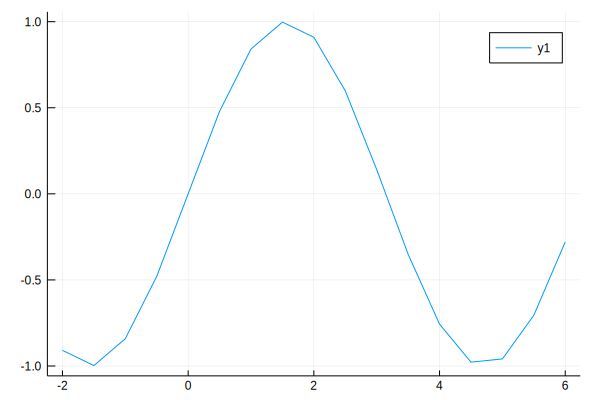

In [5]:
#construye los arreglos xs y ys
xs=-2:0.5:6
ys=[sin(x) for x in xs]
#graficalos
plot(xs,ys)

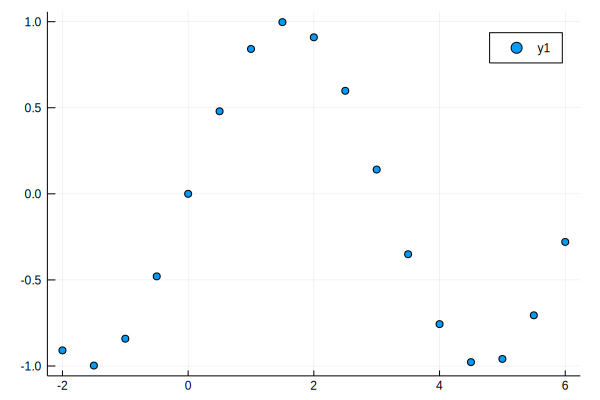

In [5]:
scatter(xs,ys)

Para modificar el grueso de la línea entre los puntos en `plot`, hay que usar el argumento adicional `lw` o `linewidth`. Para cambiar el tamaño de las esferas en scatter, utilizamos el argumento `ms` o  `markersize`

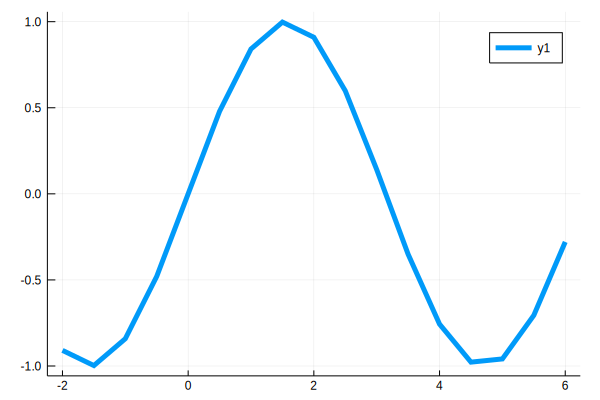

In [6]:
plot(xs,ys,lw=5)

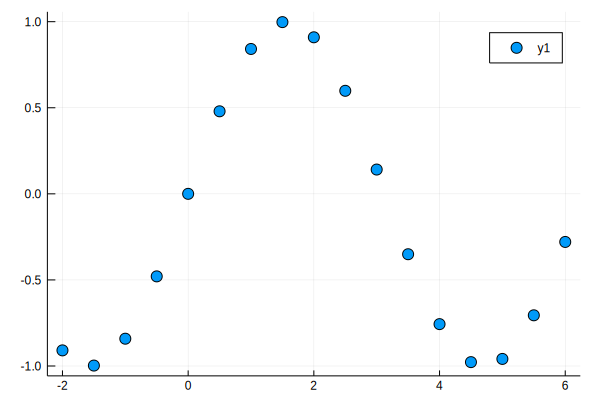

In [7]:
scatter(xs,ys,ms=6)

Para `scatter`, podemos seleccionar que tipo de figura queremos que se grafique en cada punto utilizando el argumento `marker` o `m`. El argumento puede tomar todos los siguientes valores:

* `:circle`
* `:rect`
* `:star5`
* `:diamond`
* `:hexagon`
* `:cross`
* `:xcross`
* `:utriangle`
* `:dtriangle`
* `:rtriangle`
* `:ltriangle`
* `:pentagon`
* `:heptagon`
* `:octagon`
* `:star4`
* `:star6`
* `:star7`
* `:star8`
* `:vline`
* `:hline`

Debemos mencionar que aunque estas son todas las opciones por default de Plots, no todas son compatibles con los Backends. GR si soporta todas las opciones. 

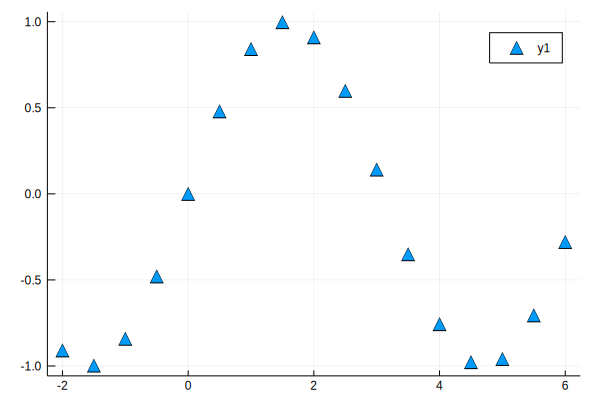

In [8]:
scatter(xs,ys,ms=6,m=:utriangle)

Para `plot`, podemos añadir una figura sobre los puntos utilizando el argumento `marker` o `m` y las opciones mencionadas previamente, y también cambiar el estilo de línea utilizando el argumento `linestyle` o `ls`. Existen las siguientes opciones:

* `:solid`
* `:dash`
* `:dot`
* `:dashdot`
* `:dashdotdot`

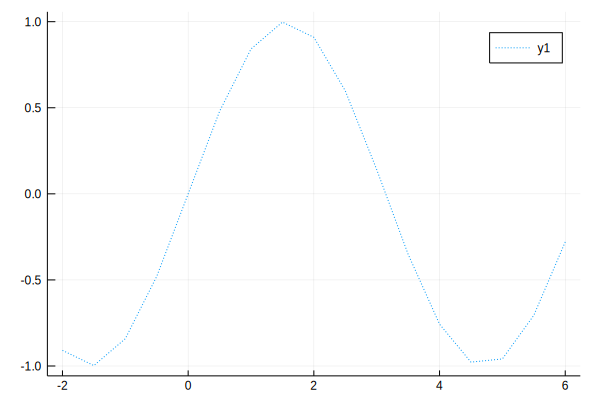

In [9]:
plot(xs,ys,ls=:dot)

## Escala de graficación

Podemos cambiar los límites específicos para los valores de $X$ y $Y$ en la gráfica utilizando los argumentos `xlim` y `ylim`, que tienen la siguiente sintaxis:
```julia

       xlim=(minimo_x,maximo_x),ylim=(minimo_y,maximo_y)

```


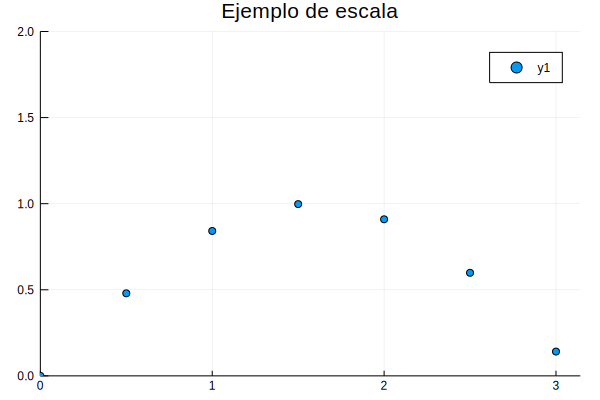

In [9]:
scatter(xs,ys,xlim=(0,pi),ylim=(0,2),title="Ejemplo de escala")

También podemos decir si queremos que los ejes de la gráfica sean logarítmicos o no usando los argumentos `xscale=:log10` y `yscale=:log10`. 

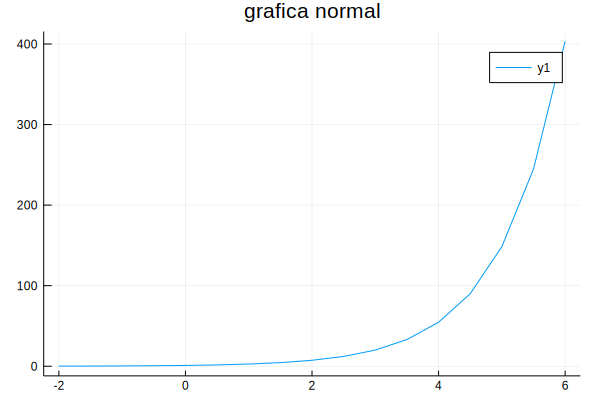

In [15]:
ys=[exp(x) for x in xs]
plot(xs,ys,title="grafica normal")

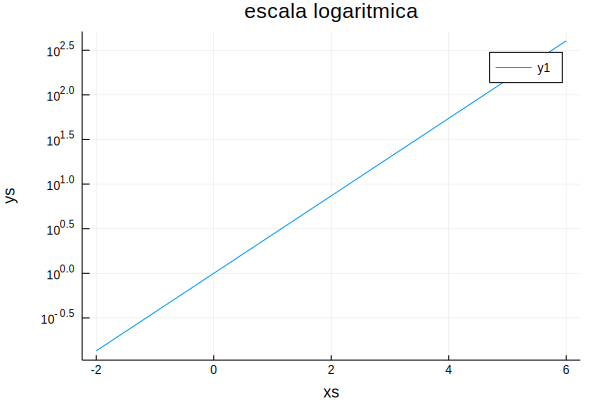

In [16]:
plot(xs,ys,yscale=:log10,title="escala logaritmica",xlabel="xs",ylabel="ys")

## Colores 

Para modificar el color de la línea entre los puntos en `plot` o de los markers en `scatter`, debemos utilizar el argumento `color` o `c`. Este argumento puede recibir dos tipos de objetos:

1. Un String con el nombre del color que deseamos. Por ejemplo `"red"` o `"black"`. Una lista completa de los colores que podemos nombrar puede consultarse [aquí](http://juliagraphics.github.io/Colors.jl/stable/namedcolors.html)

2. Un objeto RGB. Normalmente, un color digital puede describirse mediante una tercia de enteros `(R,G,B)` entre 0 y 255 donde cada entrada describe la cantidad de rojo, verde o azul, respectivamente. En julia, un objeto `RGB` se debe inicializar de la siguiente manera: `RGB(red_normed,green_normed,blue_normed)` donde `red_normed,green_normed,blue_normed` son Floats entre 0 y 1 que describen la cantidad de color que queremos. Por ejemplo, para un color rojo escribimos `RGB(1,0,0)`



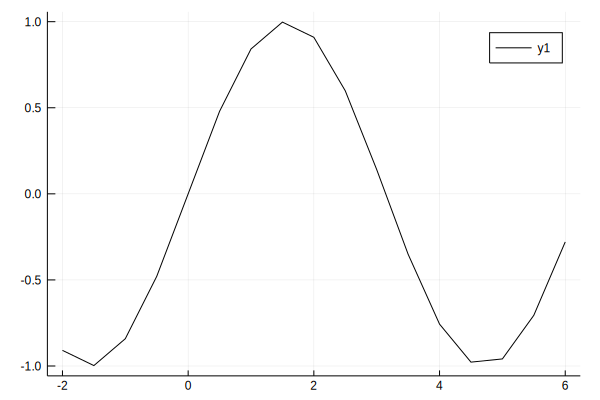

In [10]:
plot(xs,ys,c="black")

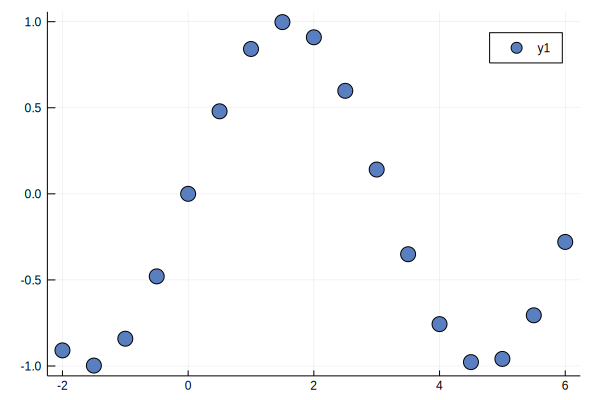

In [11]:
scatter(xs,ys,c=RGB(0.35,0.5,0.76),ms=8)

## Texto y etiquetas

Si deseamos poner título a nuestra gráfica, podemos utilizar el argumento `title`. También podemos utilizar el argumento `xlabel` y `ylabel` para ponerle nombre a los ejes. 

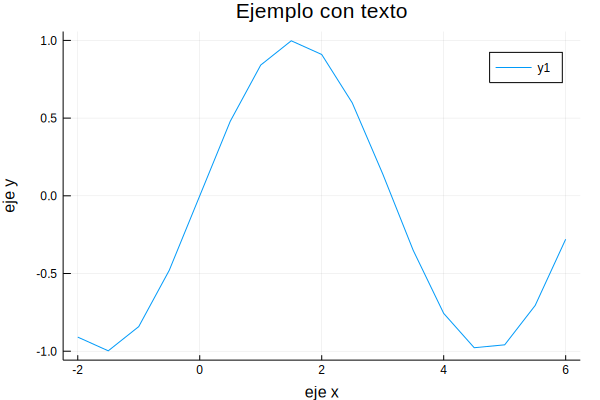

In [12]:
plot(xs,ys,title="Ejemplo con texto",xlabel="eje x",ylabel="eje y")

Para añadir texto en alguna posición de la gráfica, podemos utilizar el argumento `annotations`. Este argumento tiene la siguiente sintaxis:

```julia
    
    annotations=(x_pos,y_pos,texts)

```

Dónde `x_pos` y `y_pos` son arreglos con las posiciones X y Y dónde deseamos colocar texto y `texts` es un arreglo de strings que se pondrán en cada una de estas posiciones. Claramente, `x_pos,y_pos,texts` deben de arreglos del mismo tamaño.

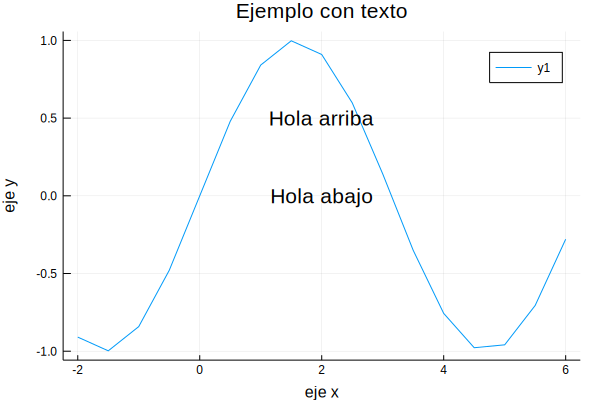

In [14]:
plot(xs,ys,
    title="Ejemplo con texto",
    xlabel="eje x",
    ylabel="eje y",
    annotations=([2,2],[0,0.5],["Hola abajo","Hola arriba"])
)

También podemos llenar el área entre una gráfica y el eje x utilizando el argumento `fill`

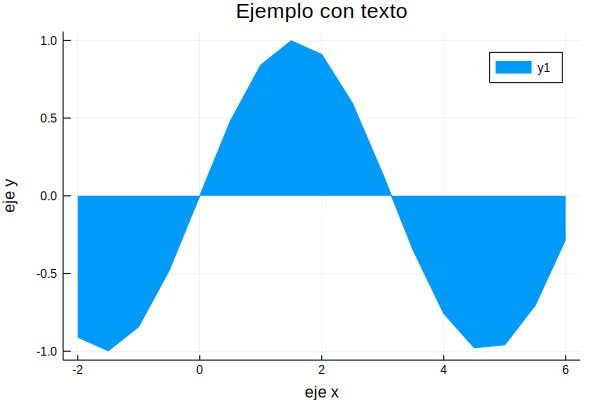

In [6]:
plot(xs,ys,
    title="Ejemplo con texto",
    xlabel="eje x",
    ylabel="eje y",
    fill=true
)

## Juntar más de una gráfica en una misma figura

Cada que llamamos una función de plots para graficar, se genera una figura autónoma. Si queremos insertar varias gráficas compatibles en una misma figura, debemos utilizar otro tipo de funciones llamadas `plot!` y `scatter!`. Estas funciones actúan de la misma manera que `plot` y `scatter`, pero en lugar de inicializar una figura nueva, añadirá la nueva gráfica a una figura ya existente:

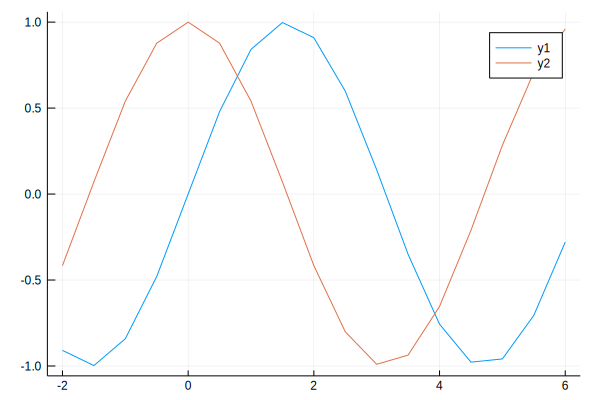

In [15]:
ys2=[cos(x) for x in xs]
plot(xs,ys)
plot!(xs,ys2)

 Para distinguir con mayor claridad entre ambas gráficas, podemos utilizar el argumento `label` para darle un nombre específico que aparezca en la leyenda de la gráfica:
 

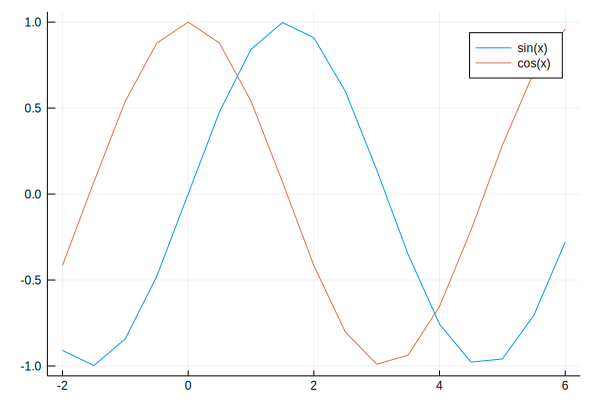

In [16]:
plot(xs,ys,label="sin(x)")
plot!(xs,ys2,label="cos(x)")

Podemos cambiar la posición de la leyenda con el atributo `legend`. Las opciones pueden ser:
* `:none`
*  `:best`
*  `:right`
*  `:left`
*  `:top`
*  `:bottom`
*  `:inside`
*  `:legend`
*  `:topright`
*  `:topleft`
*  `:bottomleft`
*  `:bottomright`

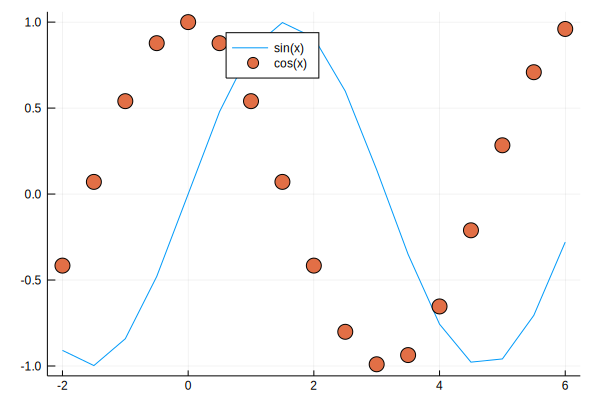

In [17]:
plot(xs,ys,label="sin(x)",legend=:top)
scatter!(xs,ys2,label="cos(x)",ms=8)

Podemos utilizar este atributo para graficar en un ciclo. Para eso, debemos guardar en una variable `p` nuestra figura inicial y después utilizar la función `display` para mostrarla. El siguiente código muestra un ejemplo de esto:

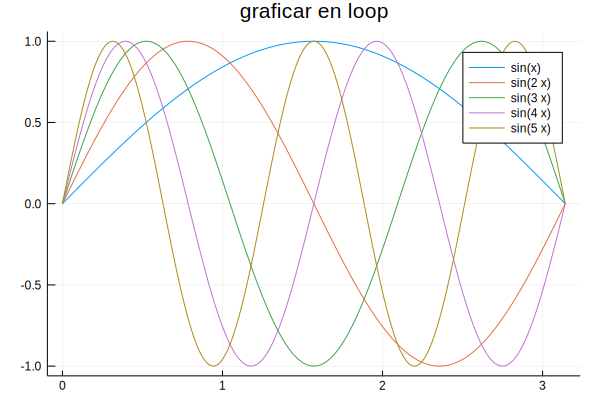

In [21]:
xs=linspace(0,pi,201)
ys=[sin(x) for x in xs]
p=plot(xs,ys,label="sin(x)",title="graficar en loop",legend=:topright)
for i in 2:5
    ys=[sin(i*x) for x in xs]
    plot!(xs,ys,label="sin($i x)")
end
display(p)

## Guardar una figura

Para guardar una figura, simplemente, después de graficarla, debemos llamar la función `savefig` con la siguiente sintaxis:

```julia
    savefig(grafica,camino_con_nombre.png)
```

In [19]:
xs=linspace(0,pi,201)
ys=[sin(x) for x in xs]
p=plot(xs,ys,label="sin(x)",title="graficar en loop",legend=:topright)
for i in 2:5
    ys=[sin(i*x) for x in xs]
    plot!(xs,ys,label="sin($i x)")
end
savefig(p,"test.png")